In [1]:
# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [2]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [3]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [4]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [5]:
X.shape

(6, 3)

In [6]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

# Building LSTM Model

In [20]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
1/1 [==============================] - 5s 5s/step - loss: 33080.8359
Epoch 2/300
1/1 [==============================] - 0s 16ms/step - loss: 32523.4609
Epoch 3/300
1/1 [==============================] - 0s 16ms/step - loss: 31884.0059
Epoch 4/300
1/1 [==============================] - 0s 26ms/step - loss: 31254.5312
Epoch 5/300
1/1 [==============================] - 0s 11ms/step - loss: 30702.0156
Epoch 6/300
1/1 [==============================] - 0s 17ms/step - loss: 30127.1426
Epoch 7/300
1/1 [==============================] - 0s 17ms/step - loss: 29569.1016
Epoch 8/300
1/1 [==============================] - 0s 18ms/step - loss: 28861.1113
Epoch 9/300
1/1 [==============================] - 0s 17ms/step - loss: 28009.5332
Epoch 10/300
1/1 [==============================] - 0s 18ms/step - loss: 27122.6074
Epoch 11/300
1/1 [==============================] - 0s 17ms/step - loss: 26214.5840
Epoch 12/300
1/1 [==============================] - 0s 17ms/step - loss: 25271.7754
Epo

1/1 [==============================] - 0s 15ms/step - loss: 11.5401
Epoch 102/300
1/1 [==============================] - 0s 12ms/step - loss: 11.0375
Epoch 103/300
1/1 [==============================] - 0s 13ms/step - loss: 10.5353
Epoch 104/300
1/1 [==============================] - 0s 14ms/step - loss: 10.0204
Epoch 105/300
1/1 [==============================] - 0s 0s/step - loss: 9.4925
Epoch 106/300
1/1 [==============================] - 0s 0s/step - loss: 8.9685
Epoch 107/300
1/1 [==============================] - 0s 0s/step - loss: 8.4556
Epoch 108/300
1/1 [==============================] - 0s 0s/step - loss: 7.9616
Epoch 109/300
1/1 [==============================] - 0s 16ms/step - loss: 7.4928
Epoch 110/300
1/1 [==============================] - 0s 16ms/step - loss: 7.0643
Epoch 111/300
1/1 [==============================] - 0s 18ms/step - loss: 6.6758
Epoch 112/300
1/1 [==============================] - 0s 11ms/step - loss: 6.3275
Epoch 113/300
1/1 [===========================

1/1 [==============================] - 0s 16ms/step - loss: 3.4758
Epoch 203/300
1/1 [==============================] - 0s 17ms/step - loss: 3.4693
Epoch 204/300
1/1 [==============================] - 0s 12ms/step - loss: 3.4560
Epoch 205/300
1/1 [==============================] - 0s 11ms/step - loss: 3.4427
Epoch 206/300
1/1 [==============================] - 0s 11ms/step - loss: 3.4333
Epoch 207/300
1/1 [==============================] - 0s 11ms/step - loss: 3.4282
Epoch 208/300
1/1 [==============================] - 0s 11ms/step - loss: 3.4255
Epoch 209/300
1/1 [==============================] - 0s 11ms/step - loss: 3.4233
Epoch 210/300
1/1 [==============================] - 0s 8ms/step - loss: 3.4213
Epoch 211/300
1/1 [==============================] - 0s 18ms/step - loss: 3.4164
Epoch 212/300
1/1 [==============================] - 0s 11ms/step - loss: 3.4095
Epoch 213/300
1/1 [==============================] - 0s 12ms/step - loss: 3.3960
Epoch 214/300
1/1 [========================

# Predicting For the next 10 data

In [21]:
# demonstrate prediction for next 10 days
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[223.70688]
1 day input [196.         210.         223.70687866]
1 day output [[235.2205]]
2 day input [210.         223.70687866 235.22050476]
2 day output [[248.94241]]
3 day input [223.70688 235.2205  248.94241]
3 day output [[262.33224]]
4 day input [235.2205  248.94241 262.33224]
4 day output [[275.3928]]
5 day input [248.94241 262.33224 275.3928 ]
5 day output [[289.5881]]
6 day input [262.33224 275.3928  289.5881 ]
6 day output [[303.80896]]
7 day input [275.3928  289.5881  303.80896]
7 day output [[318.35028]]
8 day input [289.5881  303.80896 318.35028]
8 day output [[333.67007]]
9 day input [303.80896 318.35028 333.67007]
9 day output [[349.33395]]
[223.70688, 235.2205, 248.94241, 262.33224, 275.3928, 289.5881, 303.80896, 318.35028, 333.67007, 349.33395]


In [22]:
lst_output

[223.70688,
 235.2205,
 248.94241,
 262.33224,
 275.3928,
 289.5881,
 303.80896,
 318.35028,
 333.67007,
 349.33395]

# Visualizaing The Output

In [23]:
import matplotlib.pyplot as plt

In [24]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

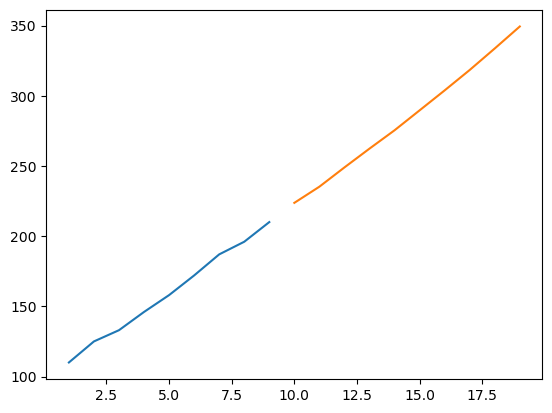

In [25]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)